## Reduced Boltzmann Machine - Dimentionality Reduction (using BernoulliRBM from sklearn)

In [64]:
import numpy as np 
import matplotlib 
import sklearn

In [65]:
np.__version__, matplotlib.__version__, sklearn.__version__

('1.26.4', '3.9.2', '1.5.1')

In [66]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

In [67]:
data = datasets.load_digits()
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [68]:
X = np.asarray(data.data, 'float32')

In [69]:
# we have 8 x 8 images
X.shape

(1797, 64)

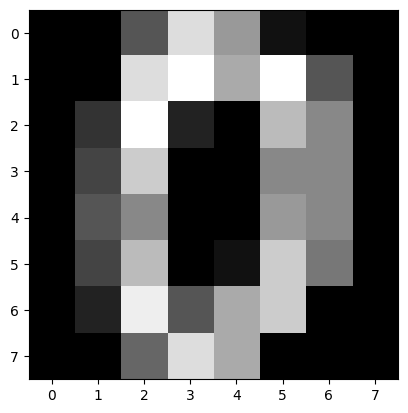

In [70]:
plt.imshow(X[0].reshape((8, 8)), cmap='gray')

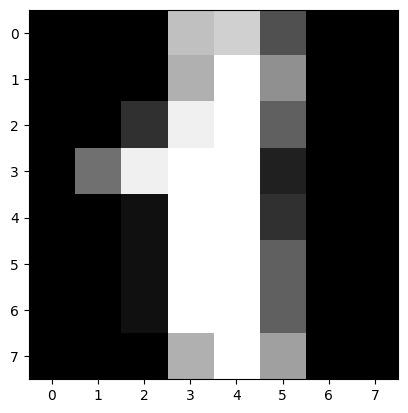

In [71]:
plt.imshow(X[1].reshape((8, 8)), cmap='gray')

In [72]:
# classes
y = data.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [73]:
normalizer = MinMaxScaler(feature_range=(0, 1))

In [74]:
X = normalizer.fit_transform(X)
X

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]],
      dtype=float32)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [76]:
X_train.shape, X_test.shape

((1437, 64), (360, 64))

In [77]:
y_train.shape, y_test.shape

((1437,), (360,))

In [78]:
rbm = BernoulliRBM(random_state=0)
rbm.n_iter = 25 # how many times node will be reconstructed (gibbs sampling)
rbm.n_components = 50 # we will reduce dimentionality from 64 pixels to 50 pixels
naive_rbm = GaussianNB()

# we are reducing the amount of pixels then we are doing the classification
classifier_rbm = Pipeline(steps=[('rbm', rbm), ('naive', naive_rbm)])
classifier_rbm.fit(X_train, y_train)

Pipeline(steps=[('rbm',
                 BernoulliRBM(n_components=50, n_iter=25, random_state=0)),
                ('naive', GaussianNB())])

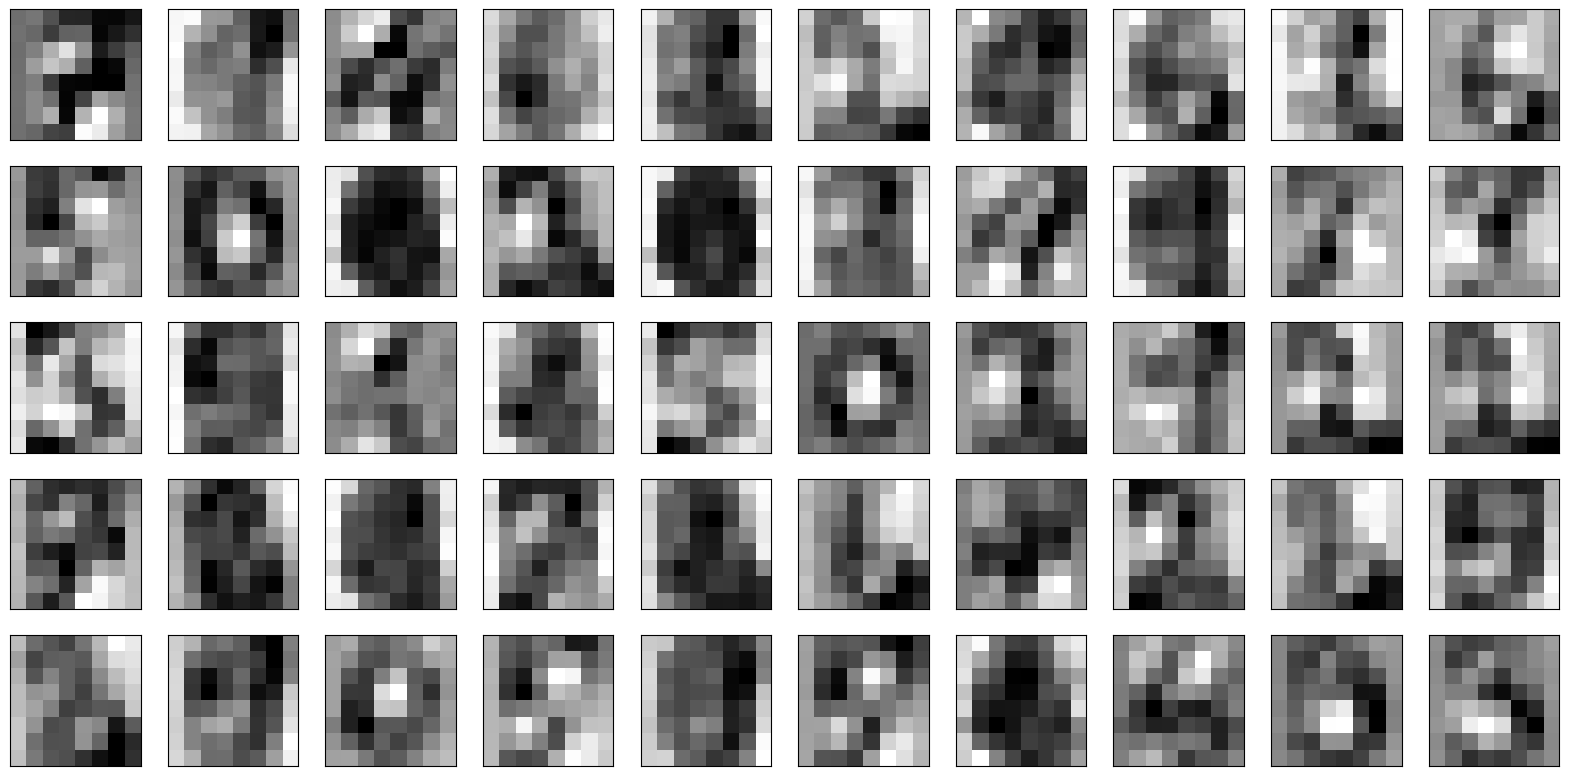

In [82]:
# going through each one od the hidden nodes
# positive values mean node was activated and negative values mean the opposite
plt.figure(figsize=(20, 20))
for i, component in enumerate(rbm.components_):
    plt.subplot(10, 10, i+1)
    plt.imshow(component.reshape((8, 8)), cmap=plt.cm.gray_r)
    plt.yticks(())
    plt.xticks(())